# Comparación de indicadores secundarios

In [139]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from keras.wrappers.scikit_learn import KerasRegressor

import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd

from matplotlib import cm, ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets

from google.colab import files

import os

In [92]:
# Carga la conexión a la base de datos
funciones1 = __import__('850_funcion1')

In [93]:
! unzip -q model_002.zip -d model_002/
model = tf.keras.models.load_model('model_002')

replace model_002/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [10]:
model.predict([[2000, 12, 2, 100]])


array([[0.6524262 , 0.08966365]], dtype=float32)

In [74]:
@np.vectorize
def PTA(model, DD, II = 12, Tinf = 2, ClCr = 100):
    DD_1 = float(DD)
    II_1 = float(II)
    Tinf_1 = float(Tinf)
    return model.predict([[DD_1, II_1, Tinf_1, ClCr]], use_multiprocessing=True)

In [103]:
dosisDD = [PTA(model, i, 12, 2) for i in np.arange(1500, 3000, 25)]

dosisDD[0:5]

[array([[0.2946927 , 0.01429382]], dtype=float32),
 array([[0.32968086, 0.01688024]], dtype=float32),
 array([[0.3600675 , 0.01924899]], dtype=float32),
 array([[0.3804758 , 0.02073044]], dtype=float32),
 array([[0.40131527, 0.02232325]], dtype=float32)]

In [104]:
dosisDD1 = np.concatenate(dosisDD, axis = 0)
np.shape(dosisDD1)

(60, 2)

In [122]:
def graficoRelIndicadores(mat, ax=None, xlab = '', ylab = '', no_arrows=10,
                          plt_kwargs={}, arrow_kwargs={}):
  if ax is None:
        ax = plt.gca()
  
  dim = np.shape(mat)

  ax.plot(mat[:,0], mat[:,1], **plt_kwargs)
  
  for i in np.linspace(0, dim[0]-2, no_arrows):
    i = i.astype(int)
    ax.arrow(mat[i,0], mat[i,1],
             mat[i+1,0]-mat[i,0],
             mat[i+1,1]-mat[i,1],
             shape = 'full', lw=0, length_includes_head=True, head_width=.01, 
             **arrow_kwargs)
  ax.set_xlabel(xlab)
  ax.set_ylabel(ylab)
  return(ax)

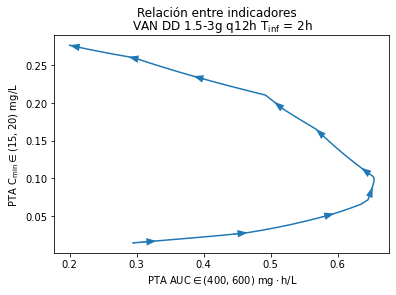

In [152]:
fig, ax = plt.subplots(1,1)
graficoRelIndicadores(dosisDD1, ax=ax, 
                      xlab='PTA $\mathrm{AUC} \in (400, 600)~\mathrm{mg\cdot h/L}$',
                      ylab='PTA $\mathrm{C_{min}} \in (15, 20)~\mathrm{mg/L}$');

ax.set_title('VAN DD 1.5-3g q12h $\mathrm{T_{inf}}$ = 2h')
fig.suptitle('Relación entre indicadores')
funciones1.guardarMatplotlib(fig, '200_relacion_PTA', path=os.path.join('.'))

In [129]:
listDosisDD = list()
tinf_vector = [2, 4, 6, 8, 12, 24]

for j in tinf_vector:
  dosisDD = [PTA(model, i, 12, j) for i in np.arange(1500, 3000, 25)]
  listDosisDD.append(dosisDD)

In [130]:
listDD1 = [np.concatenate(k, axis = 0) for k in listDosisDD]

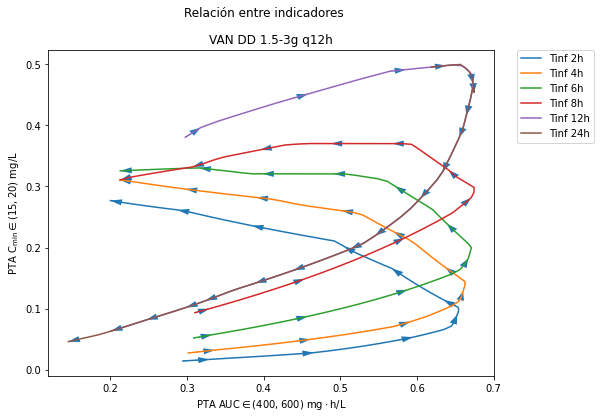

In [156]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))

for m, var in enumerate(tinf_vector):
  label = "Tinf {0}h".format(var)
  graficoRelIndicadores(listDD1[m], ax=ax, 
                        plt_kwargs = {'label': label}, 
                        arrow_kwargs = {'label': label})
  
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel('PTA $\mathrm{AUC} \in (400, 600)~\mathrm{mg\cdot h/L}$');
ax.set_ylabel('PTA $\mathrm{C_{min}} \in (15, 20)~\mathrm{mg/L}$');
ax.set_title('VAN DD 1.5-3g q12h')
fig.suptitle('Relación entre indicadores')

funciones1.guardarMatplotlib(fig, '201_relacion_PTA', path=os.path.join('.'), bbox_inches='tight')

In [133]:
listDosisDD = list()
II_vector = [6, 8, 12, 24]

for di in II_vector:
  dosisDD = [PTA(model, i, di, 2) for i in np.arange(1500, 3000, 25)]
  listDosisDD.append(dosisDD)

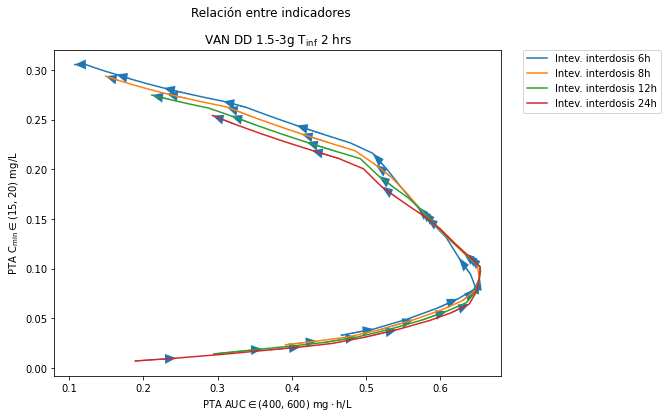

In [161]:
listDD2 = [np.concatenate(k, axis = 0) for k in listDosisDD]

fig, ax = plt.subplots(1,1, figsize = (8, 6))

for m, var in enumerate(II_vector):
  label = "Intev. interdosis {0}h".format(var)
  graficoRelIndicadores(listDD2[m], ax=ax, 
                        plt_kwargs = {'label': label}, 
                        arrow_kwargs = {'label': label})
  
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel('PTA $\mathrm{AUC} \in (400, 600)~\mathrm{mg\cdot h/L}$');
ax.set_ylabel('PTA $\mathrm{C_{min}} \in (15, 20)~\mathrm{mg/L}$');
ax.set_title('VAN DD 1.5-3g $\mathrm{T_{inf}}$ 2 hrs')
fig.suptitle('Relación entre indicadores')

funciones1.guardarMatplotlib(fig, '202_relacion_PTA', path=os.path.join('.'), bbox_inches='tight')

In [136]:
listDosisDD = list()
ClCr_vector = np.arange(80, 150, 10)

for clcr in ClCr_vector:
  dosisDD = [PTA(model, i, 12, 2, clcr) for i in np.arange(1500, 3000, 50)]
  listDosisDD.append(dosisDD)

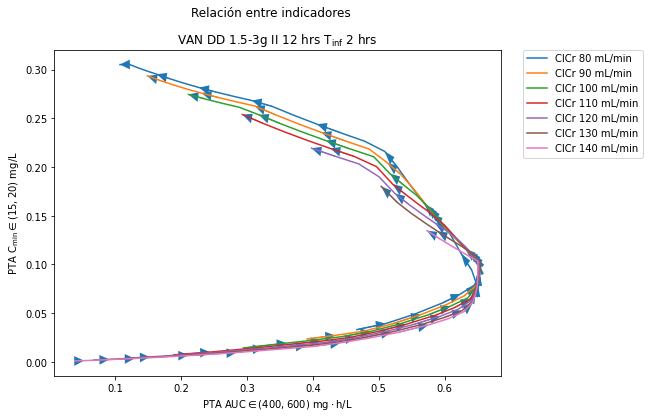

In [165]:
listDD3 = [np.concatenate(k, axis = 0) for k in listDosisDD]

fig, ax = plt.subplots(1,1, figsize = (8, 6))

for m, var in enumerate(ClCr_vector):
  label = "ClCr {0} mL/min".format(var)
  graficoRelIndicadores(listDD3[m], ax=ax, 
                        plt_kwargs = {'label': label}, 
                        arrow_kwargs = {'label': label})
  
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.set_xlabel('PTA $\mathrm{AUC} \in (400, 600)~\mathrm{mg\cdot h/L}$');
ax.set_ylabel('PTA $\mathrm{C_{min}} \in (15, 20)~\mathrm{mg/L}$');
ax.set_title('VAN DD 1.5-3g II 12 hrs $\mathrm{T_{inf}}$ 2 hrs')
fig.suptitle('Relación entre indicadores')

funciones1.guardarMatplotlib(fig, '203_relacion_PTA', path=os.path.join('.'), bbox_inches='tight')

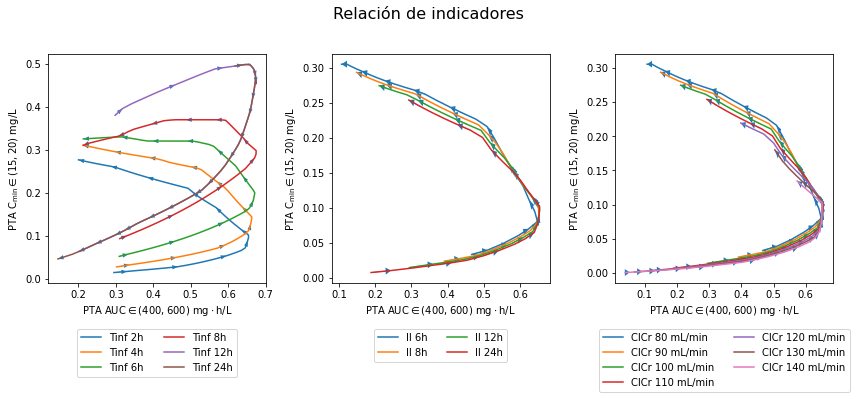

In [199]:
fig, axs = plt.subplots(1,3, figsize = (12, 5))

for m, var in enumerate(tinf_vector):
  label = "Tinf {0}h".format(var)
  graficoRelIndicadores(listDD1[m], ax=axs[0], 
                        plt_kwargs = {'label': label}, arrow_kwargs = {'label': label})
  axs[0].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0.,ncol=2)

for m, var in enumerate(II_vector):
  label = "II {0}h".format(var)
  graficoRelIndicadores(listDD2[m], ax=axs[1], 
                        plt_kwargs = {'label': label}, arrow_kwargs = {'label': label})
  axs[1].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0.0, ncol=2)

for m, var in enumerate(ClCr_vector):
  label = "ClCr {0} mL/min".format(var)
  graficoRelIndicadores(listDD3[m], ax=axs[2], 
                        plt_kwargs = {'label': label}, arrow_kwargs = {'label': label})
  axs[2].legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0.,ncol=2)

[i.set_xlabel('PTA $\mathrm{AUC} \in (400, 600)~\mathrm{mg\cdot h/L}$') for i in axs]
[i.set_ylabel('PTA $\mathrm{C_{min}} \in (15, 20)~\mathrm{mg/L}$') for i in axs]

fig.suptitle('Relación de indicadores', fontsize = 16, y = 1.1);
fig.set_tight_layout(True)

funciones1.guardarMatplotlib(fig, '204_relacion_PTA', path=os.path.join('.'), bbox_inches='tight')

In [ ]:
files.download('/content/019_superficiePTA_dosis_MIC.pdf')

In [203]:
[files.download("20{}_relacion_PTA.pdf".format(u)) for u in range(5)]
[files.download("20{}_relacion_PTA".format(u)) for u in range(5)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[None, None, None, None, None]